# <center>Блок 4. Введение в машинное обучение<center>
## <center>ML-6. Отбор и селекция признаков<center>
### <center>1.Введение<center>
### <center>2.Способы представления данных<center>

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('C:\\IDE\\data\\Block_4\\data_ford_price.xlsx')
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [3]:
X = data.drop('price', axis=1)
y = data['price']

In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'PhD']

lb.fit(education)
print('категории:', lb.classes_)
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [5]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
for column in columns_to_change:
    print('Число уникальных значений признака: {}'.format(column), data[column].nunique())

Число уникальных значений признака: cylinders 6
Число уникальных значений признака: title_status 5
Число уникальных значений признака: transmission 3
Число уникальных значений признака: drive 3
Число уникальных значений признака: size 4


In [6]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
# Запишем название новых колонок в новую переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


In [7]:
# Задание 3.7
data_onehot = pd.DataFrame(data=data_onehot, index=data.index, columns=column_names)

data_new = pd.concat([data, data_onehot], axis=1)
data_new = data_new.drop(columns=columns_to_change)
display(data_new.shape)

(7017, 30)

### <center>4.Обработка пропусков и выбросов<center>

In [8]:
# Задание 4.1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [9]:
data[~data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [10]:
# Задание 4.3
print(round(data[~data['size'].isna()].shape[0]/data.shape[0],2))

0.78


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [12]:
x = data.dropna()

In [13]:
y = y.iloc[x.index]

In [14]:
# Задание 4.3
x.shape[0] == y.shape[0]

True

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [16]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [17]:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

In [18]:
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

In [19]:
columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

In [20]:
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

In [21]:
X_train = X_train.reset_index().drop(['index'], axis=1)
X_test = X_test.reset_index().drop(['index'], axis=1)
y_train = y_train.reset_index().drop(['index'], axis=1)
y_test = y_test.reset_index().drop(['index'], axis=1)

In [22]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 1.000
Test R^2: 1.000


In [24]:
import numpy as np

#X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
#X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_test['weather']),0))

In [25]:
X_train['drive'].value_counts(True).head(1)
X_train['size'].value_counts(True).head(1)

#X_train['size'] = X_train['size'].fillna('full-size')
#X_train['drive'] = X_train['drive'].fillna('4wd')

#X_test['size'] = X_test['size'].fillna('full-size')
#X_test['drive'] = X_test['drive'].fillna('4wd')

size
full-size    0.830089
Name: proportion, dtype: float64

In [26]:
data = pd.read_excel('C:\\IDE\\data\\Block_4\\data_ford_price.xlsx')
data.head()

X = data.drop('price', axis=1)
y = data['price']

In [27]:
# Импортируем необходимые модули
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Скопируем данные в отдельную переменную
data = X.copy()
 
# В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_data = data[data['weather'].isnull()]
# И удалим эти строчки из таблицы
data.dropna(inplace=True)

# Определим целевой признак и факторы
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

# Создадим кодировщик
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

# Закодируем категориальные признаки (обучаем кодировщик только на тренировочной выборке)
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

# Результаты преобразуем обратно в DataFrame для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

# Сбросим индексы таблиц
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)

# Добавим результаты кодирования к исходным таблицам
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

# Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

# Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = LinearRegression()
model.fit(X_train_new, y_train)

# Сделаем предсказание целевой переменной (пропущенных значений в признаке weather) 
y_pred = model.predict(X_test_new)

#### <center>Работа с пропусками<center>

In [28]:
data = pd.read_excel('C:\\IDE\\data\\Block_4\\data_ford_price.xlsx')
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [29]:
data = data[['price', 'year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace=True)

y = data['price']
x = data.drop(columns='price')
x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' %mae)

MAE: 4682.957


In [31]:
from sklearn.ensemble import IsolationForest

# Ищем выбросы в обучающем наборе
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)
# Выберем все строки которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' %mae)

(4306, 6) (4306,)
MAE: 4417.742


In [32]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' %mae)

(3972, 6) (3972,)
MAE: 4420.882


In [33]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.1)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' %mae)

(3574, 6) (3574,)
MAE: 4497.490


### <center>5.Масштабирование признаков<center>

In [34]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace=True)
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [35]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' %mae)

MAE: 3.041


In [36]:
# Задача 5.2
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()
data_price = data[['price']]
data_rscaler = r_scaler.fit_transform(data_price)
display(np.round(data_rscaler[1],2))


array([0.19])

### <center>6.Трансформации распределений признаков<center>
#### <center>Quantile Transformer<center>

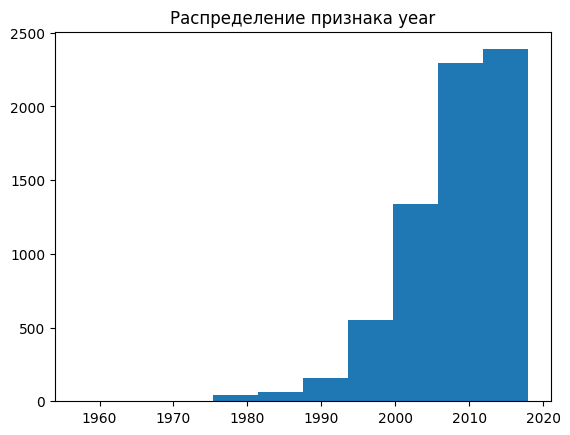

In [37]:
import matplotlib.pyplot as plt

plt.hist(data.year)
plt.title('Распределение признака year');

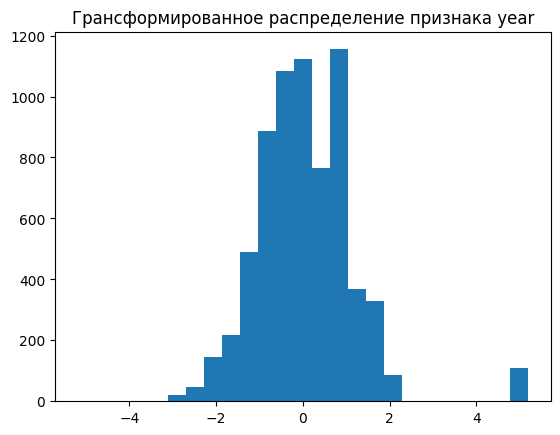

In [39]:
from sklearn.preprocessing import QuantileTransformer
# Данный трансформер принимает на вход 2D-массив, которому надо изменить формат(поскольку мы подаем на вход один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
plt.hist(data_transformed, bins=25)
plt.title('Грансформированное распределение признака year')
plt.show()

In [51]:
data = pd.read_excel('C:\\IDE\\data\\Block_4\\data_ford_price.xlsx')
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [52]:
# Задание 6.1
data_cond_for_transform = data['condition'].values.reshape((len(data),1))
data_cyl_for_transform = data['cylinders'].values.reshape((len(data),1))
quantile = QuantileTransformer(output_distribution='uniform')
data_cond_transformed = quantile.fit_transform(data_cond_for_transform)
data_cyl_transformed = quantile.fit_transform(data_cyl_for_transform)
display(np.round(data_cond_transformed[0],2))

array([0.96])

#### <center>Log Transform<center>

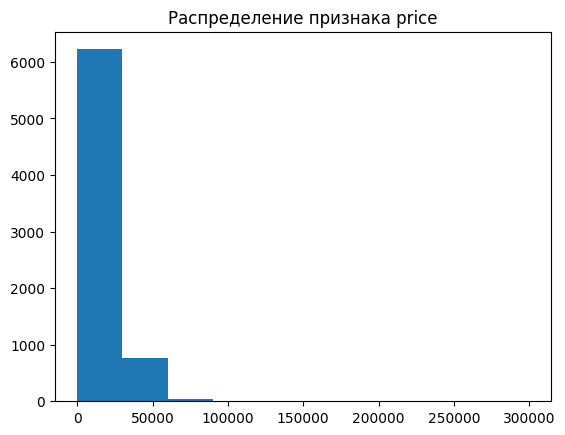

In [53]:
plt.hist(data.price)
plt.title('Распределение признака price');

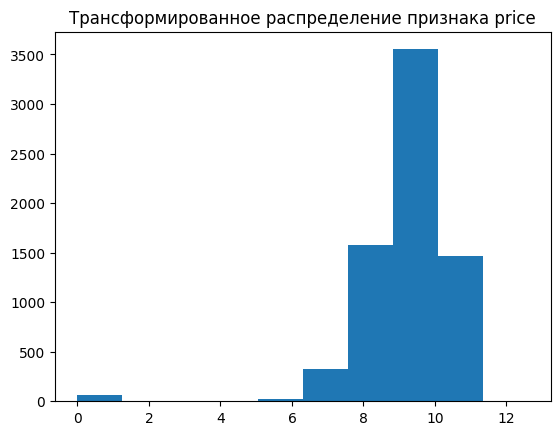

In [54]:
log_price = np.log(data['price'])

plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [55]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis=1)
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


In [60]:
# Задание 6.3
display(np.round(price_data['transformed_price'][-1:],1))

7016    9.8
Name: transformed_price, dtype: float64

#### <center>Power Tranformer Scaler<center>

In [70]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Предположим, что data — это DataFrame с колонками 'price' и 'year'
# Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'")

# Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError("Для применения Box-Cox все значения должны быть положительными")

# Преобразование с помощью PowerTransformer
box_cox = PowerTransformer(method='box-cox')

# Создадим копию ДФ для проеобразования boxcox scipy
test_data_year = data.copy()

from scipy.stats import boxcox

data_box_cox_price = box_cox.fit_transform(data[['price']].values)

data_box_cox_year = boxcox(test_data_year['year'])

# Создадим DataFrame с преобразованными данными
data_box_cox_price = pd.DataFrame(data_box_cox_price, columns=['transformed_price'])
data_box_cox_year = pd.DataFrame(data_box_cox_year, columns=['transformed_year'])

data_box_cox = pd.concat([data_box_cox_price, data_box_cox_year], axis=1)

c:\Users\Smoking Shop\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 123.77792357708721, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


TypeError: 'numpy.float64' object is not iterable

### <center>7.Даты и расстояния<center>

In [85]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [86]:
Latitude = str(data['lat'][0])
Longitude = str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

GeocoderInsufficientPrivileges: Non-successful status code 403

In [87]:
address = location.raw['address']
address

NameError: name 'location' is not defined

In [88]:
print(data['lat'][5])
print(data['long'][5])

45.518031
-122.578752
